<a href="https://colab.research.google.com/github/Manu-2211/assignment-submission/blob/main/TASK_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
data = pd.read_csv('IPL Matches 2008-2020.csv')
data.head(5)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:

#to check out the info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [ ]:
data.describe()#checking statistics of dataset

,id,neutral_venue,result_margin
count,8.160000e+02,816.000000,799.000000
mean,7.563496e+05,0.094363,17.321652
std,3.058943e+05,0.292512,22.068427
min,3.359820e+05,0.000000,1.000000
25%,5.012278e+05,0.000000,6.000000
50%,7.292980e+05,0.000000,8.000000
75%,1.082626e+06,0.000000,19.500000
max,1.237181e+06,1.000000,146.000000


In [ ]:
#find out the null values present in the dataset
data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

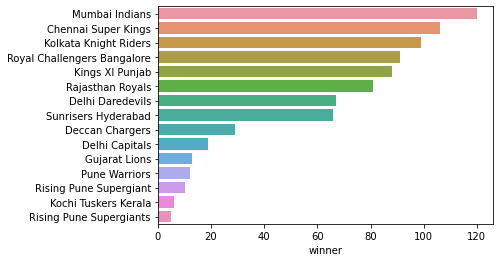

In [ ]:
sns.barplot(y=data['winner'].value_counts().index,x=data['winner'].value_counts())

In [ ]:
data['player_of_match'].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
EJG Morgan         1
Mohammed Shami     1
TM Dilshan         1
MS Bisla           1
AS Joseph          1
Name: player_of_match, Length: 233, dtype: int64

# team info

In [ ]:
team_info=pd.DataFrame({'Total Matches': data.team1.value_counts() + data.team2.value_counts(),'Toss Won':data.toss_winner.value_counts(),'Total Won': data.winner.value_counts(),'Total Loss':((data.team1.value_counts()+data.team2.value_counts())-data.winner.value_counts())})

In [ ]:
team_info

,Total Matches,Toss Won,Total Won,Total Loss
Chennai Super Kings,178,97,106,72
Deccan Chargers,75,43,29,46
Delhi Capitals,33,20,19,14
Delhi Daredevils,161,80,67,94
Gujarat Lions,30,15,13,17
Kings XI Punjab,190,85,88,102
Kochi Tuskers Kerala,14,8,6,8
Kolkata Knight Riders,192,98,99,93
Mumbai Indians,203,106,120,83
Pune Warriors,46,20,12,34


In [ ]:
winloss = team_info['Total Won']/team_info['Total Matches']
winloss = pd.DataFrame({'Winloss Ratio': team_info['Total Won']/team_info['Total Matches']})
winloss= winloss.round(2)
team_info=team_info.join(winloss)
team_info

,Total Matches,Toss Won,Total Won,Total Loss,Winloss Ratio
Chennai Super Kings,178,97,106,72,0.60
Deccan Chargers,75,43,29,46,0.39
Delhi Capitals,33,20,19,14,0.58
Delhi Daredevils,161,80,67,94,0.42
Gujarat Lions,30,15,13,17,0.43
Kings XI Punjab,190,85,88,102,0.46
Kochi Tuskers Kerala,14,8,6,8,0.43
Kolkata Knight Riders,192,98,99,93,0.52
Mumbai Indians,203,106,120,83,0.59
Pune Warriors,46,20,12,34,0.26


Text(0.5, 1.0, 'Maximum Toss Won')

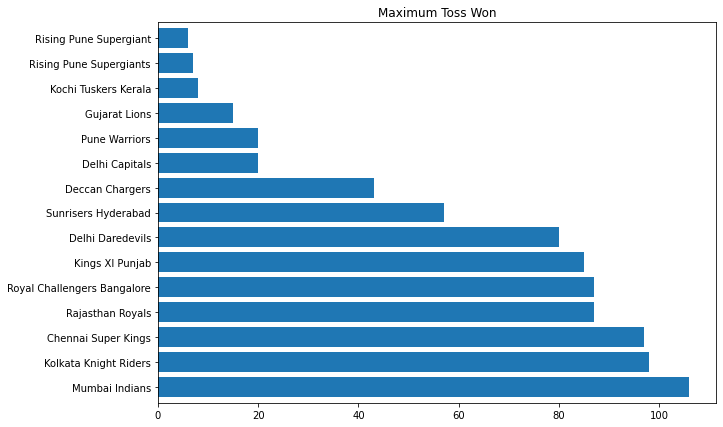

In [ ]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,7))
ax=data['toss_winner'].value_counts().plot.barh(width=0.8)
plt.title('Maximum Toss Won')

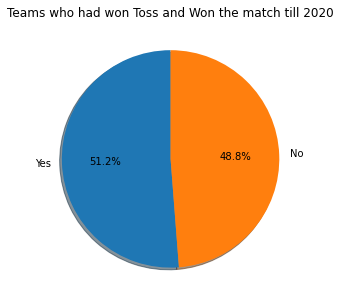

In [ ]:

Tosswin_matchwin=data[data['toss_winner']==data['winner']]
slices= [len(Tosswin_matchwin),(len(data)-len(Tosswin_matchwin))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%')
plt.title("Teams who had won Toss and Won the match till 2020")
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.show()

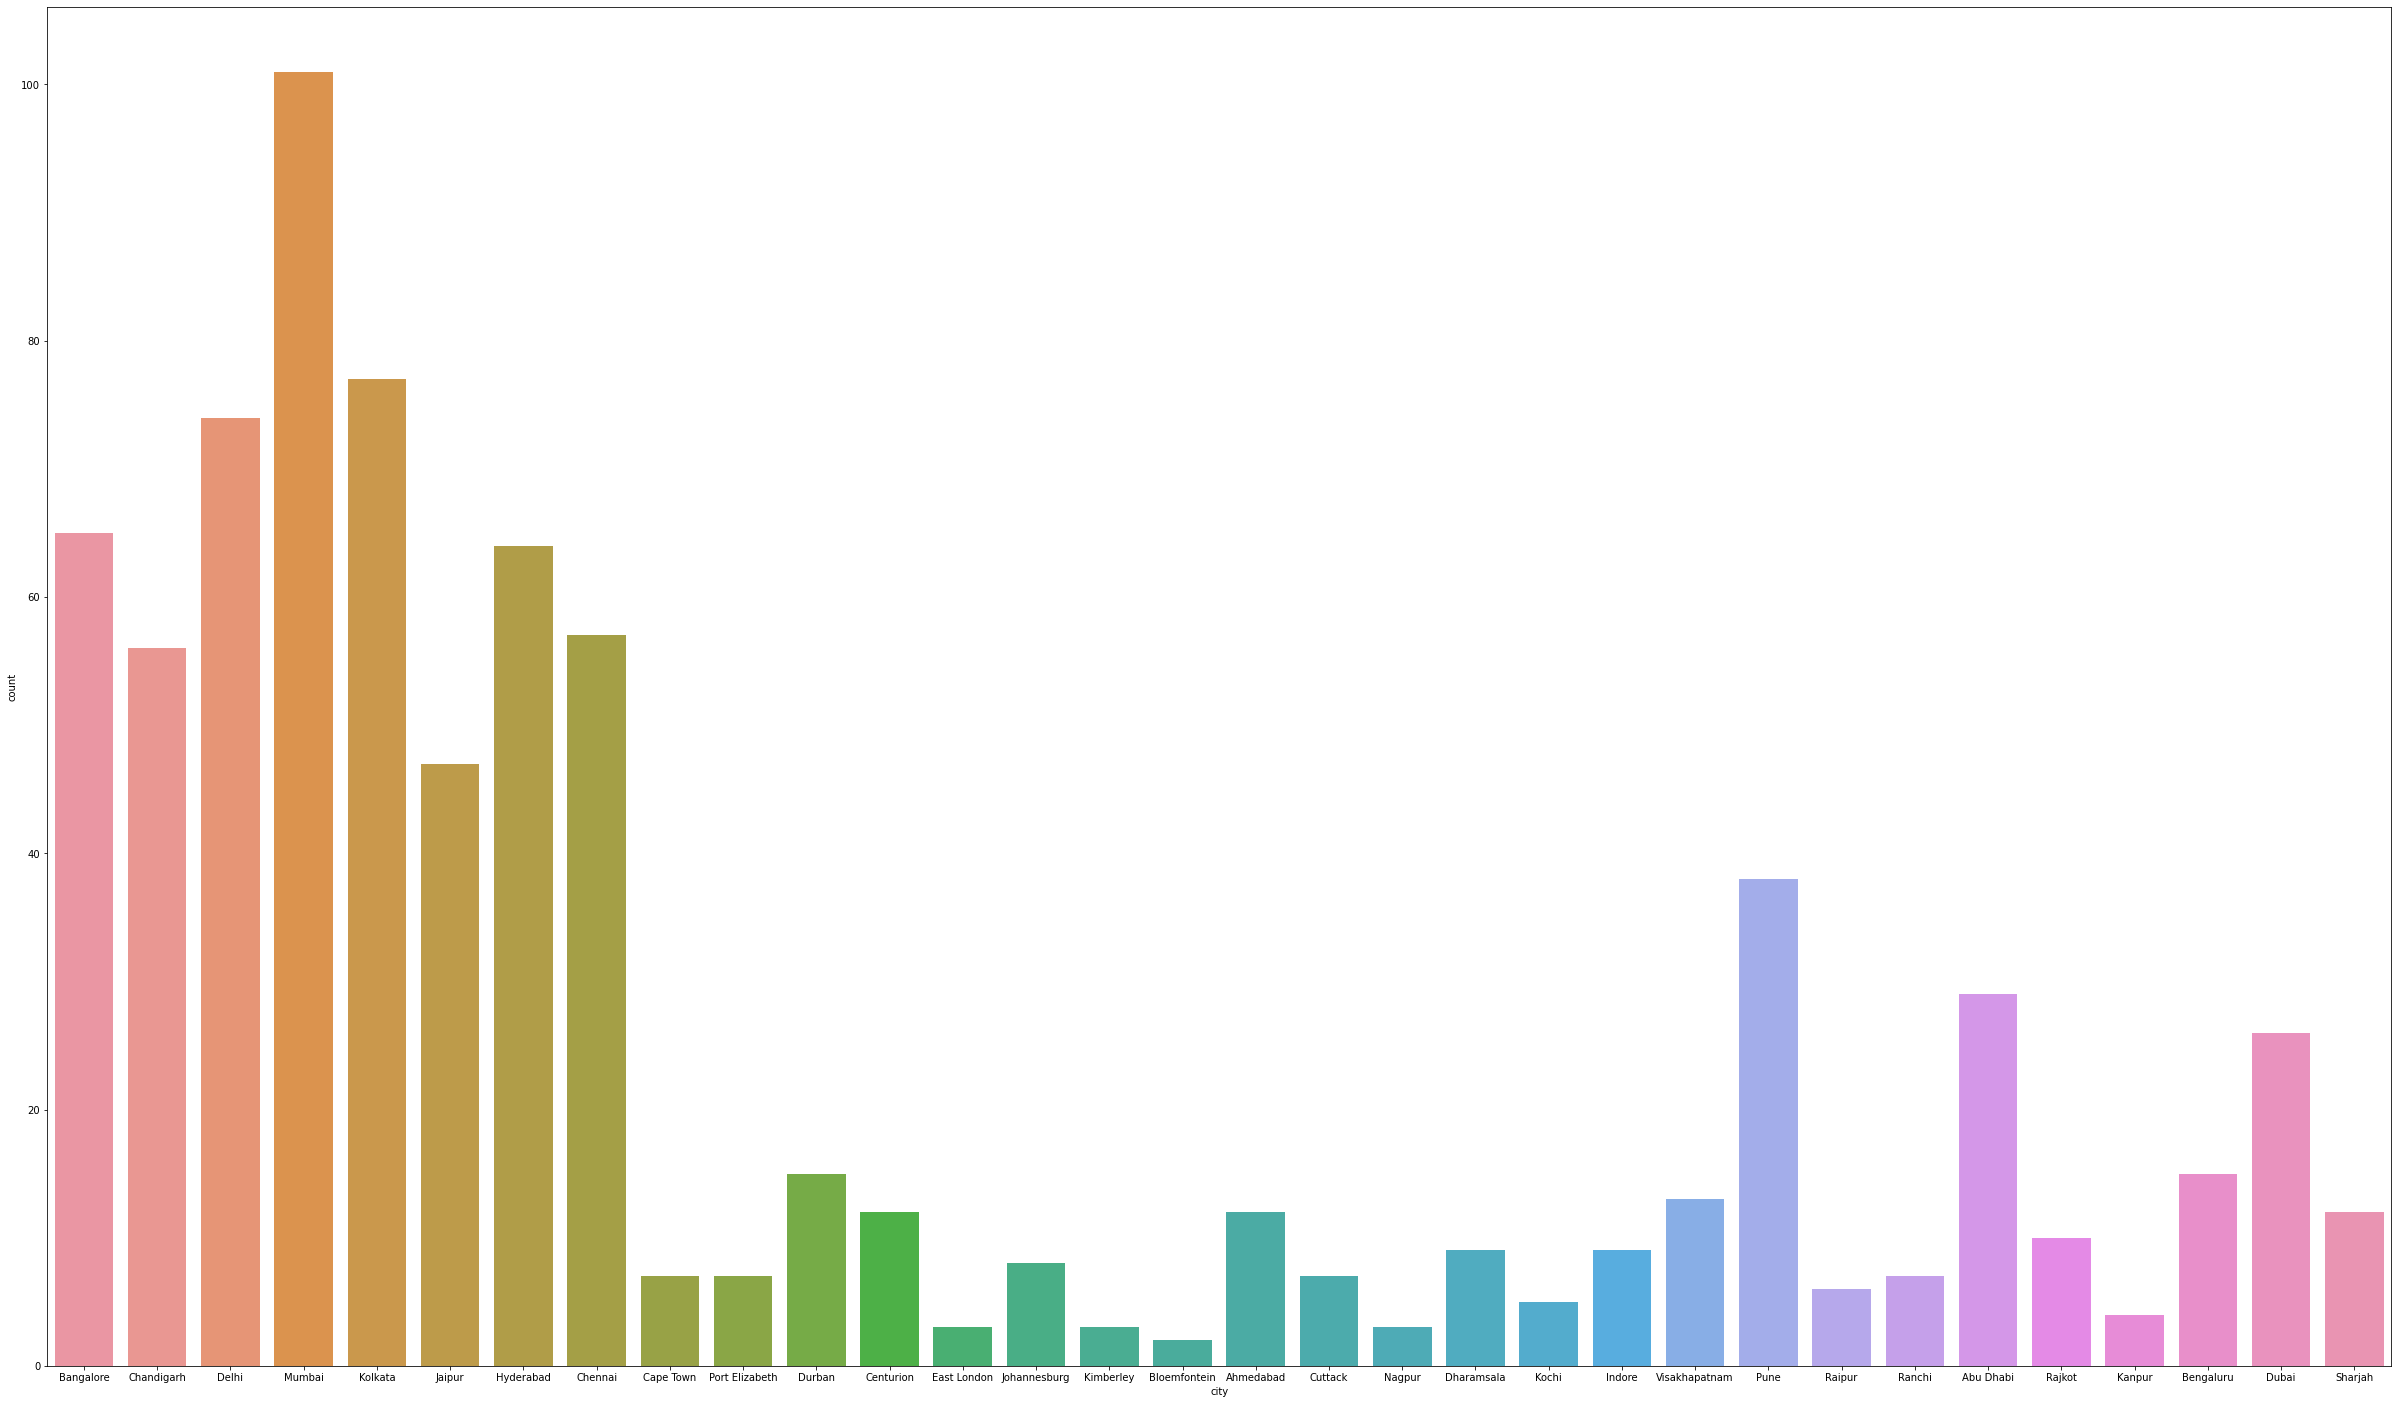

In [ ]:
import seaborn as sns
fig,ax= plt.subplots(figsize=(42,25))
sns.countplot(data['city'],ax=ax,data=data)